# Region-Based Image Segmentation Using Watershed Technique

---

## Project Information

| **Details** | |
|-------------|------------------------------|
| **Author** | Cyril Ashong |
| **Student ID** | 11253767 |
| **Topic** | Watershed Segmentation |
| **Libraries** | opencv-python, numpy, matplotlib |
| **Algorithm** | Watershed (Region-Based Segmentation) |

---


## Table of Contents

1. Introduction  
2. Theory of Watershed Segmentation  
3. Mathematical Background  
   - 3.1 Grayscale Conversion  
   - 3.2 Gaussian Blurring  
   - 3.3 Thresholding  
   - 3.4 Morphological Operations  
   - 3.5 Distance Transform  
   - 3.6 Marker Labelling  
4. Implementation  
   - 4.1 Importing Libraries  
   - 4.2 Loading the Image  
   - 4.3 Image Preprocessing  
   - 4.4 Foreground and Background Extraction  
   - 4.5 Applying Watershed Algorithm  
5. Results and Visualization  



# Watershed Segmentation

Watershed segmentation is a region-based segmentation technique that treats the image as a topographic surface.

Bright pixels represent peaks.
Dark pixels represent valleys.

The algorithm floods the valleys from markers until waters meet, forming boundaries.

Advantages:
- Good for separating touching objects
- Produces clear boundaries

Disadvantages:
- Prone to over-segmentation
- Requires preprocessing


# Watershed Segmentation Implementation
This notebook demonstrates the step-by-step implementation of the watershed segmentation algorithm using OpenCV.


### Import Required Libraries
We import OpenCV for image processing, NumPy for numerical operations, and Matplotlib for visualization.


In [ ]:
!pip install opencv-python matplotlib numpy


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Environment Ready")


Environment Ready


### Load the Image
The image is loaded from the specified file path and converted from BGR to RGB for correct display.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using your exact path
image = cv2.imread("/content/Coins.jpg")

# Check if image loaded correctly
if image is None:
    print("Image did not load. Check the path.")
else:
    print("Image loaded successfully!")


Image loaded successfully!


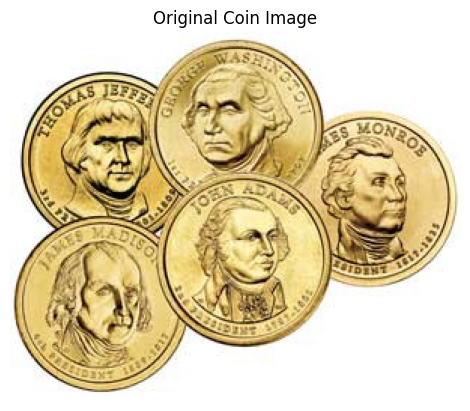

In [ ]:
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("Original Coin Image")
plt.axis("off")
plt.show()


### Convert to Grayscale
The image is converted to grayscale to simplify processing and focus on intensity values instead of color.


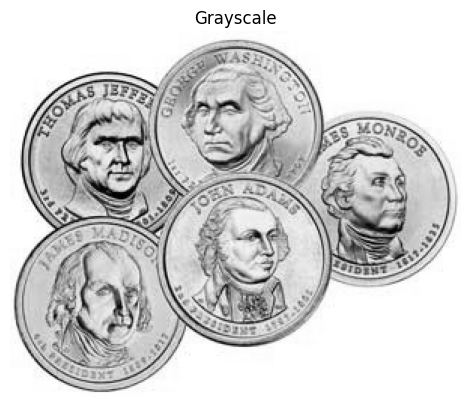

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")
plt.show()


### Apply Gaussian Blur
Gaussian blur reduces noise and smooths the image to prevent unnecessary segmentation.


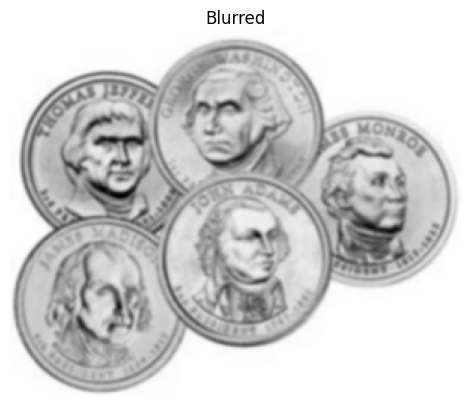

In [ ]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

plt.imshow(blur, cmap='gray')
plt.title("Blurred")
plt.axis("off")
plt.show()


### Apply Thresholding
Thresholding converts the image into a binary format to separate the object from the background.


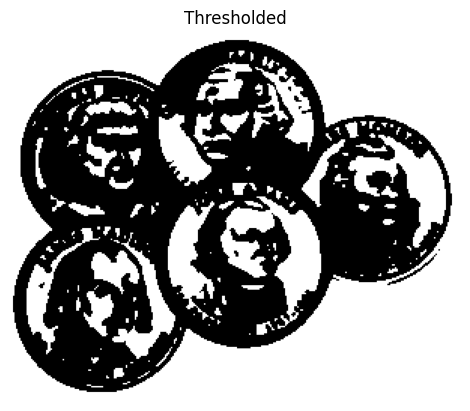

In [ ]:
_, thresh = cv2.threshold(
    blur, 0, 255,
    cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.imshow(thresh, cmap='gray')
plt.title("Thresholded")
plt.axis("off")
plt.show()


### Morphological Closing
Closing fills small gaps and holes inside the segmented object.


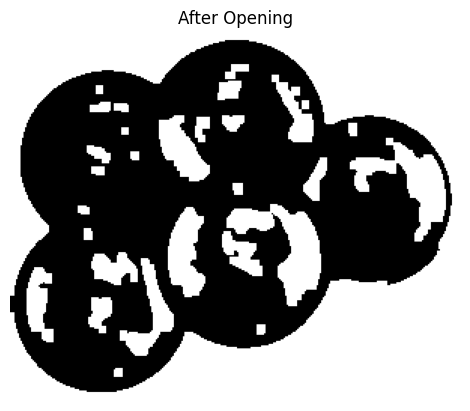

In [ ]:
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(
    thresh,
    cv2.MORPH_OPEN,
    kernel,
    iterations=2
)

plt.imshow(opening, cmap='gray')
plt.title("After Opening")
plt.axis("off")
plt.show()


### Identify Sure Background
Dilation is applied to expand the background region.


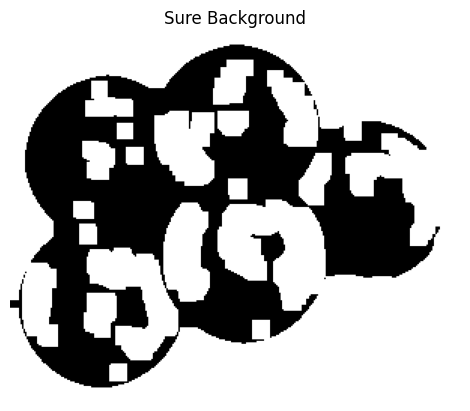

In [ ]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

plt.imshow(sure_bg, cmap='gray')
plt.title("Sure Background")
plt.axis("off")
plt.show()


### Distance Transform
The distance transform identifies the center regions of objects to define sure foreground areas.


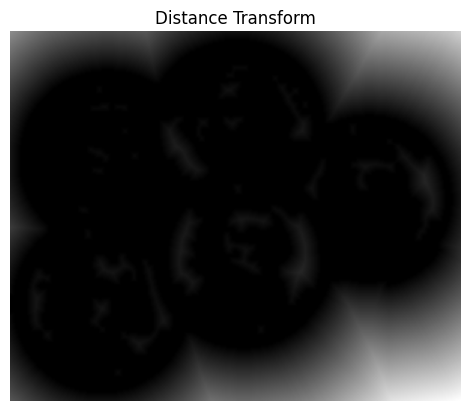

In [ ]:
dist_transform = cv2.distanceTransform(
    opening,
    cv2.DIST_L2,
    5
)

plt.imshow(dist_transform, cmap='gray')
plt.title("Distance Transform")
plt.axis("off")
plt.show()


### Identify Sure Foreground
Thresholding the distance transform isolates the most confident foreground regions.


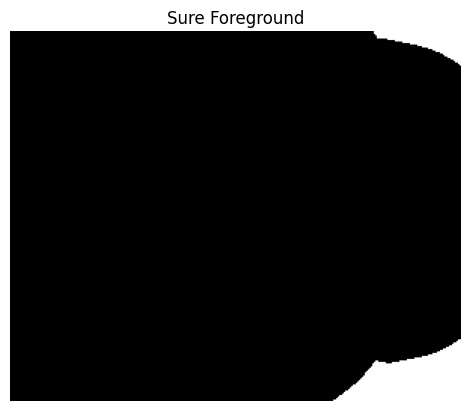

In [ ]:
_, sure_fg = cv2.threshold(
    dist_transform,
    0.6 * dist_transform.max(),
    255,
    0
)

sure_fg = np.uint8(sure_fg)

plt.imshow(sure_fg, cmap='gray')
plt.title("Sure Foreground")
plt.axis("off")
plt.show()


### Determine Unknown Region
The unknown region is obtained by subtracting the foreground from the background.


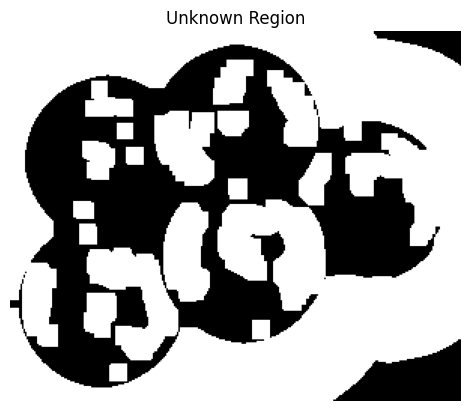

In [ ]:
unknown = cv2.subtract(sure_bg, sure_fg)

plt.imshow(unknown, cmap='gray')
plt.title("Unknown Region")
plt.axis("off")
plt.show()


### Create Markers
Connected components are labeled to generate markers required for the watershed algorithm.


In [ ]:
_, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0


### Apply Watershed Algorithm
The watershed function floods the image from markers and draws boundaries where regions meet.
The detected boundaries are highlighted on the original image.

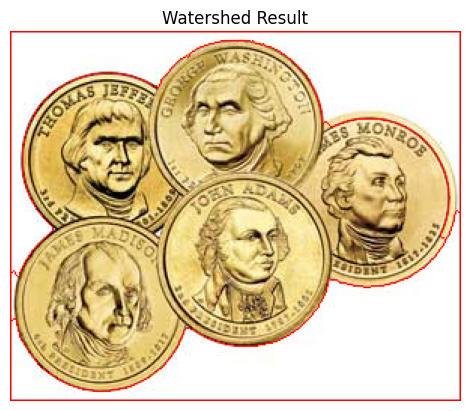

In [ ]:
markers = cv2.watershed(image, markers)

# Mark boundaries in red
image[markers == -1] = [0, 0, 255]

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Watershed Result")
plt.axis("off")
plt.show()

Observation:

The watershed algorithm successfully identified the boundary of the coin.
However, due to gradient lighting and highlights, some inner regions were also segmented.

